In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Data
x = [0.86, 0.09, -0.85, 0.87, -0.44, -0.43, -1.10, 0.40, -0.96, 0.17]

y = [2.49, 0.83, -0.25, 3.10, 0.87, 0.02, -0.12, 1.81, -0.83, 0.43]

data = pd.DataFrame(x,columns=['x'])
data['y'] = y
data

,x,y
0,0.86,2.49
1,0.09,0.83
2,-0.85,-0.25
3,0.87,3.10
4,-0.44,0.87
5,-0.43,0.02
6,-1.10,-0.12
7,0.40,1.81
8,-0.96,-0.83
9,0.17,0.43


## Part 1: Statsmodel Linear Regression

In [55]:
# Creating statsmodel
sModel = smf.ols('y ~ x',data=data).fit()
sModel.summary()

/Users/ransckd/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.82
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           0.000166
Time:                        16:58:32   Log-Likelihood:                -6.7092
No. Observations:                  10   AIC:                             17.42
Df Residuals:                       8   BIC:                             18.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0588      0.171      6.202      0.000       0.665       1.452
x              1.6102      0.243      6.620      0.000       1.049       2.171
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.404
Skew:                          -0.242   Prob(JB):                        0.817
Kurtosis:                       2.143   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Intercept
results = sModel.params
results

Intercept    1.058813
x            1.610168
dtype: float64

In [58]:
sModel.conf_int()

,0,1
Intercept,0.665134,1.452493
x,1.049261,2.171076


In [59]:
# Predicting results
yPred = sModel.predict(data['x'])

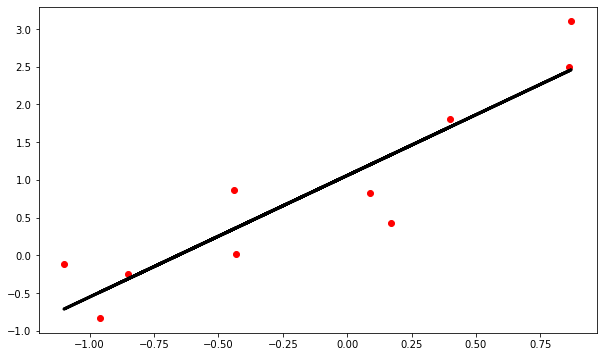

In [68]:
# Plotting it
plt.figure(figsize=(10,6))

plt.scatter(data['x'], data['y'], color='red')
plt.plot(data['x'], yPred, color = 'black', linewidth = 3)

## Part 2: Scikit-learn

In [31]:
# Creating and fitting sckit Linear regression model
lr = LinearRegression()
lr.fit(np.array(data['x']).reshape(-1,1),data['y'])

LinearRegression()

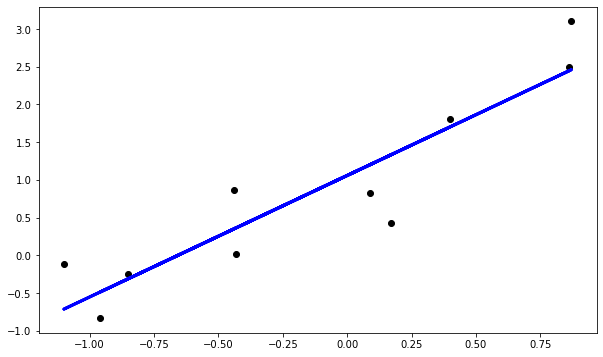

In [69]:
# Predicting values
yPredicted = lr.predict(np.array(data['x']).reshape(-1,1))

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(data['x'], data['y'],  color='black')
plt.plot(data['x'], yPredicted, color='blue', linewidth=3)

In [70]:
# Checking Mean Squared Error
from sklearn.metrics import mean_squared_error

print("MSE: " + str(mean_squared_error(data['y'], yPredicted)))

MSE: 0.22401590347546643
